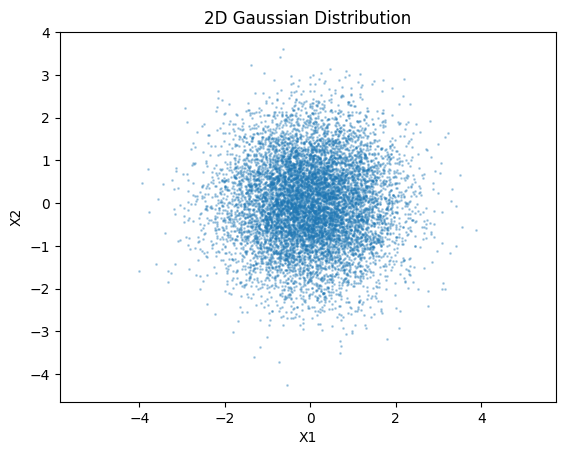

In [193]:
import numpy as np
import matplotlib.pyplot as plt

mean = [0, 0] # point of mean
cov = [[1, 0], [0, 1]]  # covariance matrix

n = 10000
data = np.random.multivariate_normal(mean, cov, n)

# Visualization of Gaussian distribution
plt.scatter(data[:, 0], data[:, 1], s=1, alpha=0.3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Gaussian Distribution')
plt.axis('equal')
plt.show()


K-means algorithm for finding clusters

In [194]:
def kmeans(X, k, iters):
    # Init centroids randomly
    n_samples = 10000
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    # history of centroids and groups for each iteration
    centroids_history = [centroids.copy()]
    labels_history = []

    flag = False

    for it in range(iters):
        # Find nearest centroid for each point
        labels = np.array([np.argmin([np.linalg.norm(x - centroid) for centroid in centroids]) for x in X])
        labels_history.append(labels)

        # Move centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])

        centroids_history.append(new_centroids)

        # Nothing to do, groups formed
        if np.all(new_centroids == centroids):
            if flag == False: 
                print(it)
                flag = True
            #break

        centroids = new_centroids

    return centroids, labels, centroids_history, labels_history

# kmeans results for k = 3
centroids, labels, centroids_history, labels_history = kmeans(data, k=3, iters=88)


In [195]:
# calculating average norm of centroids in each iteration
R = []
avgR = []
sumR = 0
for i, centroids in enumerate(centroids_history):
    Ri = 0
    for centroid in centroids:
        Ri += np.linalg.norm(centroid)
    Ri /= 3
    R.append(Ri)
    sumR += Ri
    avgR.append(sumR / (i+1))
    #print(f"w {i}-tej iteracji R wynosil {Ri}, a srednia R = {sumR/(i+1)}")

Changes of cumulative average norm of centroids in each iteration of K-means

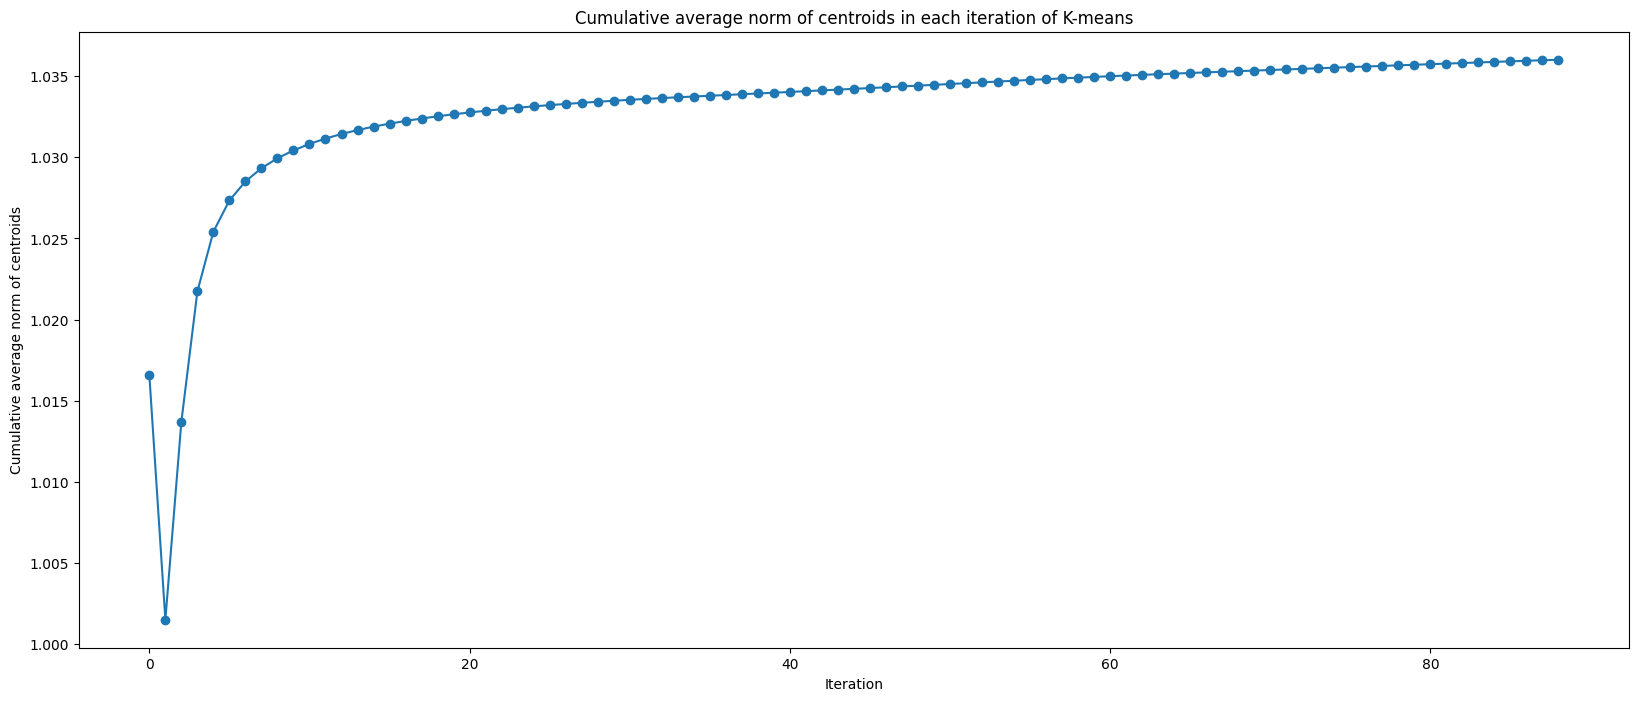

In [196]:
iters = range(0, len(centroids_history))
plt.figure(figsize=(20, 8))
plt.plot(iters, avgR, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Cumulative average norm of centroids")
plt.title("Cumulative average norm of centroids in each iteration of K-means")
plt.show()

Estimation of the number of iterations needed instead of 88 to achieve 9-digit accuracy
in the cumulative averages.

13390 of iterations was needed to achive 9-digit accuracy in the cumulative averages


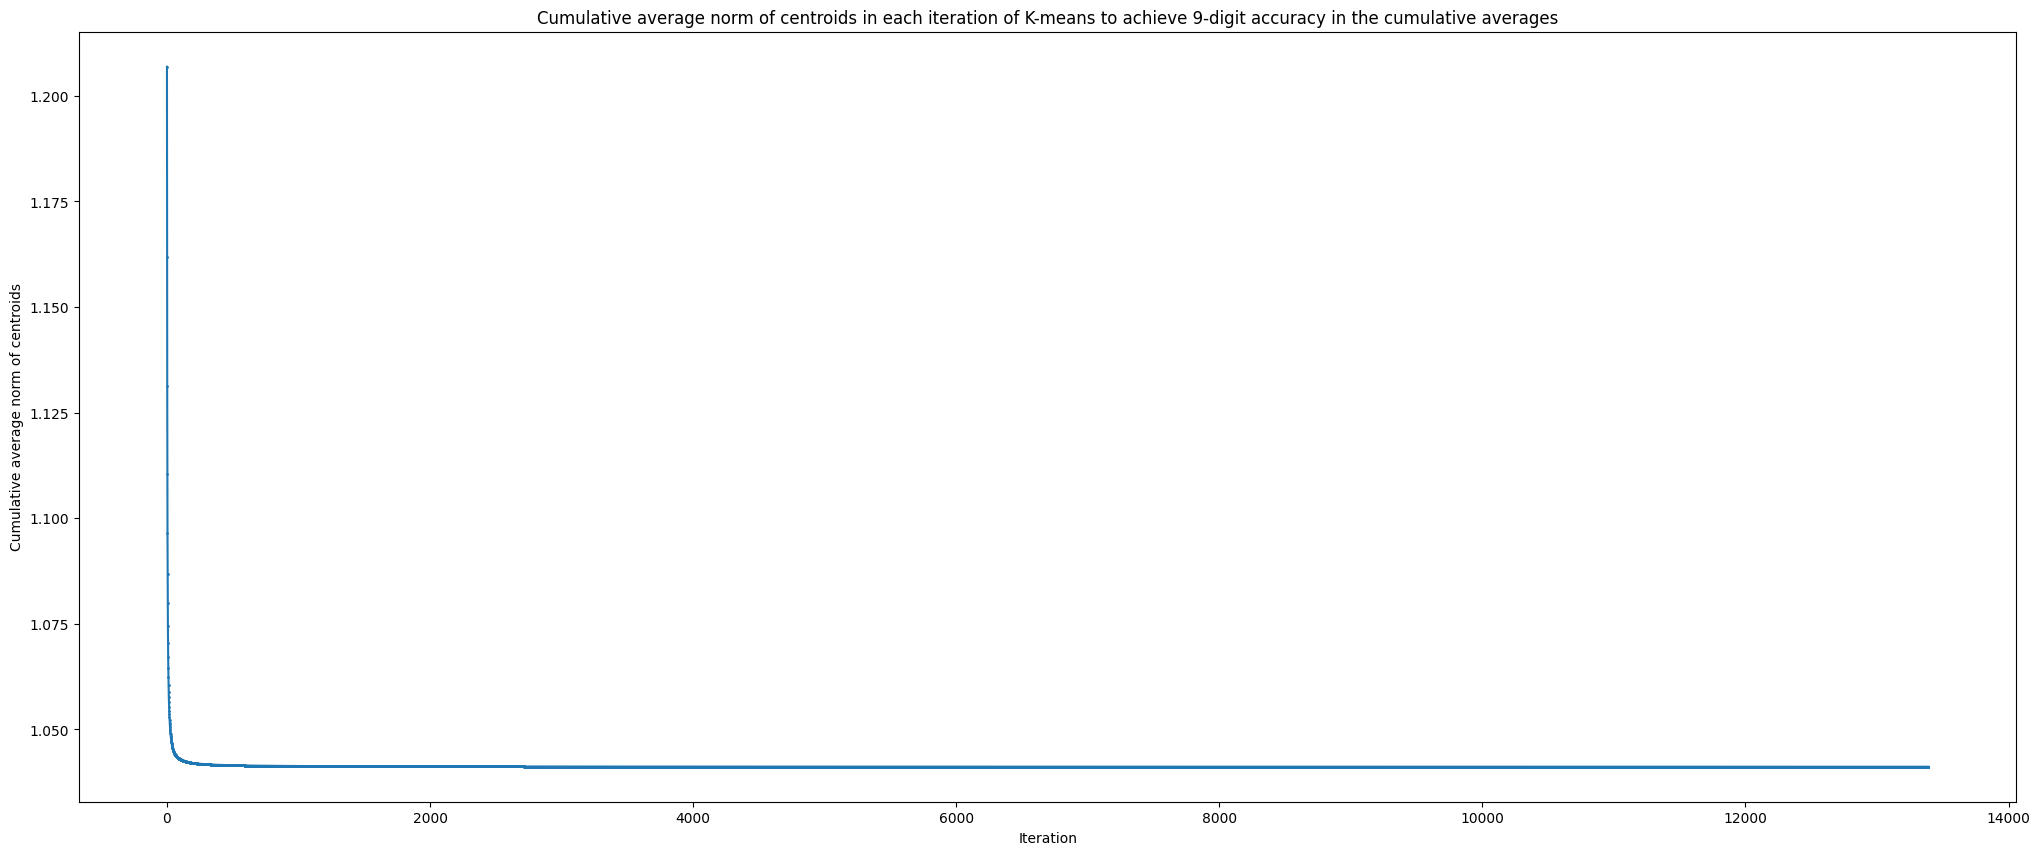

In [201]:
def experiment(X, k):
    n_samples = 10000
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    iter = 0
    R = []
    avgR = []
    sumR = 0
    lastAvg = 0
    tolerance = 1e-9
    while True:
        labels = np.array([np.argmin([np.linalg.norm(x - centroid) for centroid in centroids]) for x in X])
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])
        centroids = new_centroids
        
        Ri = 0
        for centroid in centroids:
            Ri += np.linalg.norm(centroid)
        Ri /= 3
        R.append(Ri)
        sumR += Ri
        avgR.append(sumR / (iter+1))

        #print(f'iteration : {iter}, accuracy : {abs(lastAvg - sumR / (iter+1))}')

        if abs(lastAvg - sumR / (iter+1)) < tolerance:
            break
        
        lastAvg = sumR / (iter+1)
        iter += 1

    print(f'{iter} of iterations was needed to achive 9-digit accuracy in the cumulative averages')

    iters = range(0, iter+1)
    plt.figure(figsize=(25, 10))
    plt.plot(iters, avgR, marker='o', markersize=1)
    plt.xlabel("Iteration")
    plt.ylabel("Cumulative average norm of centroids")
    plt.title("Cumulative average norm of centroids in each iteration of K-means to achieve 9-digit accuracy in the cumulative averages")
    plt.show()

experiment(data, k=3)

Changes of centroids in time of K-means

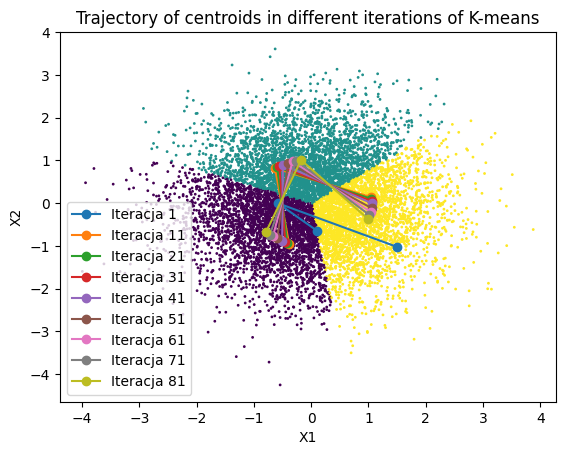

In [202]:
plt.scatter(data[:, 0], data[:, 1], c=labels, s=1, cmap='viridis')

for i, centroids in enumerate(centroids_history):
    if i % 10 == 0: plt.plot(centroids[:, 0], centroids[:, 1], marker='o', label=f'Iteracja {i+1}')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Trajectory of centroids in different iterations of K-means")
plt.show()